
<a id='chap-tparbresdecision'></a>

Decision Trees

The objective of this assignment is to demonstrate the implementation of decision trees for classification and regression problems. 

## Decision trees

Decision trees are nonparametric learning methods used for classification and regression problems. The goal is to create a model that predicts the values of the target variable, based on a set of sequences of decision rules inferred from the training data. The tree therefore approximates the target by a succession of if-then-else rules. This paradigm applies to both categorical and numerical data. The more complex the tree generated, the better the model “explains” the learning data but the higher the risk of over-fitting. 

Decision trees have several advantages that make them interesting in contexts where it is useful to understand the sequence of decisions made by the model:

•	They are easy to understand and visualize.

•	They require little data preparation (normalization, etc.).

•	The cost of using trees is logarithmic.

•	They can use categorical and numerical data.

•	They can deal with multi-class problems.

•	White box model: the result is easy to conceptualize and visualize.

However, these models have two major disadvantages:

•	Over-fitting: sometimes the generated trees are too complex and generalize badly. Choosing good values for the maximum depth (max_depth) and minimum number of samples per leaf (min_samples_leaf) parameters avoids this problem.

•	It may happen that the generated trees are not balanced, which implies that the travel time is no longer logarithmic. It is therefore recommended to adjust the dataset before construction, to avoid that one class largely dominates the others in terms of the number of training examples
 

## Trees for classification


We start by importing the right modules and building the tree object:

In [1]:
# To install the last version of sklearn
!pip install -U scikit-learn

In [1]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

For the example, we can define a minimalist dataset (two points, each in a class):

In [2]:
X = [[0, 0], [1, 1]]
y = [0, 1]

The tree is built using the `.fit(X, y)` method:

In [3]:
clf = clf.fit(X, y)

Prediction on new samples is done in the usual way with `.predict(X)` :

In [4]:
clf.predict([[2., 2.]])

array([1])

One can also predict the probability of each class for a sample:

In [5]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

## Classification of Iris data

`DecisionTreeClassifier` is able to handle multi-class classification problems (eg with labels 0, 1, … K-1). In this example we will work with the [Iris](https://archive.ics.uci.edu/ml/datasets/Iris) dataset, , easily accessible in `sklearn`. This dataset contains 150 instances of iris (a type of plant, each observation describes its morphology). The objective is to classify each instance into one of three categories: *Iris setosa*, *Iris virginica* or *Iris versicolor*.

One of the classes is linearly separable with respect to the other two, but the other two are not separable with respect to each other.


<dl style='margin: 20px 0;'>
<dt>The attributes of the dataset are:</dt>
<dd>
- sepal length,  
- sepal width,  
- petal length,  
- petal width, 
- class: Iris Setosa, Iris Versicolor or Iris Virginica. 


</dd>

</dl>

The Iris dataset being very common, scikit-learn offers a native function to load it into memory:

In [6]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

In [7]:
type(X)

numpy.ndarray


Calculate the statistics (mean and standard deviation) of the four explanatory variables: sepal length, sepal width, petal length and petal width.

## Solution : 

Step 1 : Get data for each attribute from the dataset :

In [8]:
import numpy as np
sepal_length = X[:,0]
sepal_width = X[:,1]
petal_length = X[:,2]
petal_width = X[:,3]

Step 2 : Calculating the mean of each attribute :

In [9]:
# Calculating the mean of the sepal length attribute
mean_of_sepal_length = round(np.mean(sepal_length),2)

print("Mean of the sepal length attribute:", mean_of_sepal_length)

# Calculating the mean of the sepal width attribute
mean_of_sepal_width = round(np.mean(sepal_width),2)

print("Mean of the sepal width attribute:", mean_of_sepal_width)

# Calculating the mean of the petal length attribute
mean_of_petal_length = round(np.mean(petal_length),2)

print("Mean of the petal length attribute:", mean_of_petal_length)

# Calculating the mean of the petal width attribute
mean_of_petal_width = round(np.mean(petal_width),2)

print("Mean of the petal width attribute:", mean_of_petal_width)


Mean of the sepal length attribute: 5.84
Mean of the sepal width attribute: 3.06
Mean of the petal length attribute: 3.76
Mean of the petal width attribute: 1.2


Step 3 : Calculating the standard deviation of each attribute :

In [10]:
# Calculating the standard deviation of the sepal length attribute
std_of_sepal_length = round(np.std(sepal_length),2)

print("Standard Deviation of the sepal length attribute:", std_of_sepal_length)

# Calculating the standard deviation of the sepal width attribute
std_of_sepal_width = round(np.std(sepal_width),2)

print("Standard Deviation of the sepal width attribute:", std_of_sepal_width)

# Calculating the standard deviation of the petal length attribute
std_of_petal_length = round(np.std(petal_length),2)

print("Standard Deviation of the petal length attribute:", std_of_petal_length)

# Calculating the standard deviation of the petal width attribute
std_of_petal_width = round(np.std(petal_width),2)

print("Standard Deviation of the petal width attribute:", std_of_petal_width)

Standard Deviation of the sepal length attribute: 0.83
Standard Deviation of the sepal width attribute: 0.43
Standard Deviation of the petal length attribute: 1.76
Standard Deviation of the petal width attribute: 0.76



How many examples of each class are there?

Before building the model, let's split the dataset into two: 70% for training, 30% for testing.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

We can now build a decision tree on this data:

In [12]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

Once the training is finished, we can visualize the tree, either with  `matplotlib` using the `plot_tree` method, or with the  `graphviz` tool (dot command). For example, with  `matplotlib`:

[Text(0.4, 0.9, 'x[3] <= 0.75\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.7, 'x[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.2, 0.5, 'x[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[3] <= 1.75\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.7, 0.3, 'x[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

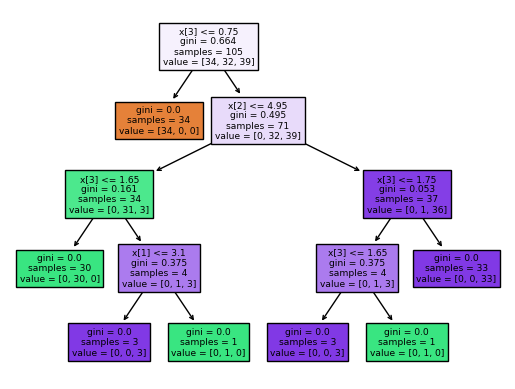

In [13]:
tree.plot_tree(clf, filled=True)

In [14]:
import pandas as pd
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['Class'])

print(iris_df.columns)
print(len(iris_df['Class']))
unique_Class_From_Dataset = iris_df['Class'].unique()
print(unique_Class_From_Dataset)
print((iris_df.Class).count())

# How to get the unique values count
frequency = iris_df.Class.value_counts()
print(frequency)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Class'],
      dtype='object')
150
[0. 1. 2.]
150
0.0    50
1.0    50
2.0    50
Name: Class, dtype: int64


In [17]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

The test score can be calculated this way:

In [18]:
clf.score(X_test, y_test)

0.9777777777777777



Change the `max_depth` and `min_samples_leaf` parameter values. What do you notice?

## Solution:

Setting the parameters - max_depth and min_samples_leaf to evaluate the behavior of the decision tree :
max_depth = 2,
min_samples_leaf = 2

In [15]:
clf.set_params(max_depth=2, min_samples_leaf=2)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)

Train the modified model and plot the tree :

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.35\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.053\nsamples = 37\nvalue = [0, 1, 36]')]

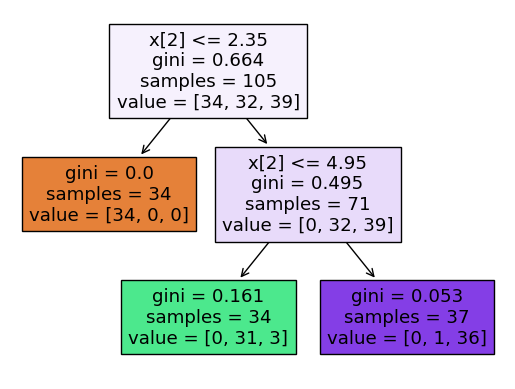

In [16]:
clf.fit(X_train, y_train)
tree.plot_tree(clf, filled=True)

Predit the modified model on the test data :

In [21]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

Calculate the test score of the modified model :

In [22]:
clf.score(X_test, y_test)

0.9111111111111111

## Observation : 
As max_depth was reduced in the tree the precision of the model also reduced. This may be because of the following reasons -
1) Decreased max_depth reduces the overfitting problem in the model. But in many cases by reducing this value, the model's capacity of understanding complex patterns are also reduced.
2) A shallow tree will lose complex patterns and attribute relations as it will now consider less information. On the other hand, a dense tree will try to gather more information and relations hence improving the performance.

Similarly, when we increase the value of min_samples_leaf, we increase the constraint of minimum samples to be present in each leaf. This will again make the model lose important patterns and only capture generic relations.



The problem here being particularly simple, redo a training/test division with 5% of the data in training and 95% test. 
Calculate the rate of misclassified items on the test set. 
Vary (or better, perform a grid search with `GridSearchCV`) the values of the `max_depth` and `min_samples_leaf` parameters to measure their impact on this score.

## Solution :

Setting the training size as 5% of the data and testing size as 95% of the data and evaulating the test score :

In [17]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, train_size=0.05, random_state=0)

In [18]:
clf_new = tree.DecisionTreeClassifier()

In [19]:
clf_new.fit(X_train_new, y_train_new)

DecisionTreeClassifier()

In [20]:
clf_new.predict(X_test_new)

array([2, 1, 0, 2, 0, 2, 0, 2, 1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 1, 2, 0, 2, 0,
       0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2, 0, 2, 0, 0, 0,
       1, 2, 0, 0, 2, 1, 0, 1, 2, 0, 2, 0, 0, 2, 2, 1, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2,
       2, 2, 0, 0, 2, 2, 0, 1, 0, 2, 1])

In [22]:
clf_new.score(X_test_new, y_test_new)

0.7552447552447552

With training/test division with 5% of the data in training and 95% test, the test score is 75.52%.
Now we will set some hyperparameters values and use GridSearchCV to get the best value of max_depth and min_samples_leaf to improve the performance of the model.

GridSearchCV takes each values from the hyperparameter grid and internally tests the model for different pairs and evaluates its metrics like accuracy, test score etc. At the end it selects the pair of best hyperparameters and creates the final model with it.

In [23]:
hyperparameter_grid = {
    'max_depth': [None, 2, 5, 8, 10, 12, 15],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7]
}

In [24]:
from sklearn.model_selection import GridSearchCV
grid_search_cv_object = GridSearchCV(estimator=clf_new, param_grid=hyperparameter_grid, cv =2)

In [25]:
grid_search_cv_object.fit(X_train_new, y_train_new)

C:\Users\scorp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 2, 5, 8, 10, 12, 15],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7]})

In [26]:
best_estimator_model = grid_search_cv_object.best_estimator_

In [27]:
y_pred = best_estimator_model.predict(X_test_new)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2,
       2, 2, 0, 1, 2, 2, 0, 1, 1, 1, 1])

In [28]:
best_estimator_model.score(X_test_new, y_test_new)

0.951048951048951

In [29]:
from sklearn.metrics import accuracy_score
# Calculating the rate of misclassified items
misclassified_rate = 1 - accuracy_score(y_test_new, y_pred)

print("Misclassified Rate on Test Data:", round(misclassified_rate,2))

Misclassified Rate on Test Data: 0.05


In [30]:
# Get the best pair of best parameters
best_params = grid_search_cv_object.best_params_

best_max_depth = best_params['max_depth']
best_min_samples_leaf = best_params['min_samples_leaf']

print("Best max_depth:", best_max_depth)
print("Best min_samples_leaf:", best_min_samples_leaf)

Best max_depth: 2
Best min_samples_leaf: 1


## Conclusion :

- Before using GridSearchCV the test score is 75.52 %
- After using GridSerachCV the test score is 95.10 %
- The misclassified rate on testing data is 0.05
- The best parameters selected by GridSearchCV are max_depth = 2 and min_samples_leaf = 1

###   Display of the decision surface

For a pair of attributes, i.e., for two-dimensional observations, we can visualize the decision surface in 2 dimensions. First, we discretize the two-dimensional domain with a constant step and then we evaluate the model on each point of the grid.


In this example, we only keep the length and width of the petals.

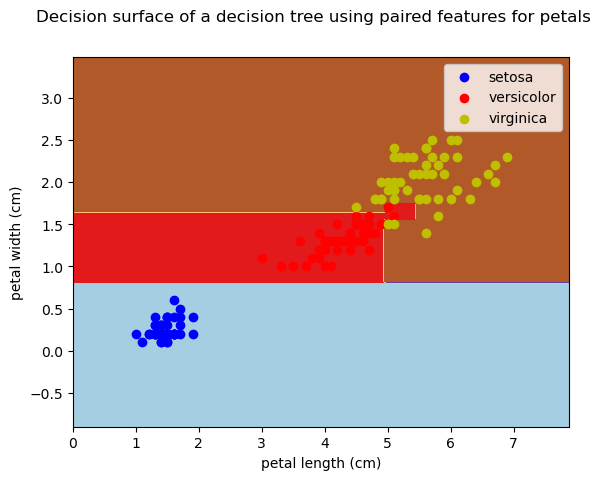

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Settings
n_classes = 3
plot_colors = "bry" # blue-red-yellow
plot_step = 0.02

# Choose the length and width attributes of the petals
pair = [2, 3]

# We only keep the two attributes
X = iris.data[:, pair]
y = iris.target

# Tree learning
clf = tree.DecisionTreeClassifier().fit(X, y)

# Display of the decision surface
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

# Display of learning points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features for petals")
plt.legend()
plt.show()

## Question 5:

Redo the display for the other pairs of attributes. On which pair is the separation between the classes the most marked?

## Solution:

Plotting the decision surface for the other pair of attributes that is sepals to evaluate the separation between classes among the two pairs.

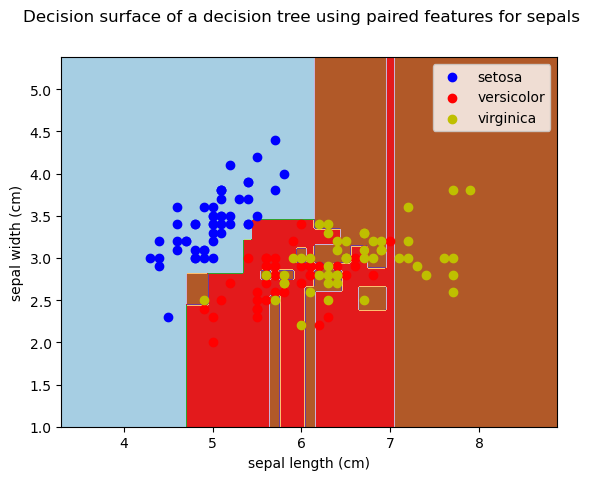

In [23]:
# Choose the length and width attributes of the sepals
pair = [0, 1]

# We only keep the two attributes
X = iris.data[:, pair]
y = iris.target

# Tree learning
clf = tree.DecisionTreeClassifier().fit(X, y)

# Display of the decision surface
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

# Display of learning points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features for sepals")
plt.legend()
plt.show()

## Conclusion:

Observing the decision surface in 2 dimensions for two pairs of attributes i.e petals - length and width, sepals - length and width, we can conclude that the pai of petals have the more clear separation of the classes of setosa, versicolor and virginica. The boundries among the classes is more clear and stright and clusters are well formed of the class points for the petal pair of length and width attribute.

## 	Decision trees for regression

For regression with decision trees, scikit-learn offers the `DecisionTreeRegressor` class. As for the classification, the  `fit(...)` takes as input the parameter `X` (attributes of the observations). Warning: the `y` are not class labels but real values.

In [24]:
from sklearn import tree

X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([0.5])

In the following example, we will construct a sinusoidal signal affected by white noise and we will train a regression tree on this training data.

Text(0.5, 1.0, 'Noisy sine wave')

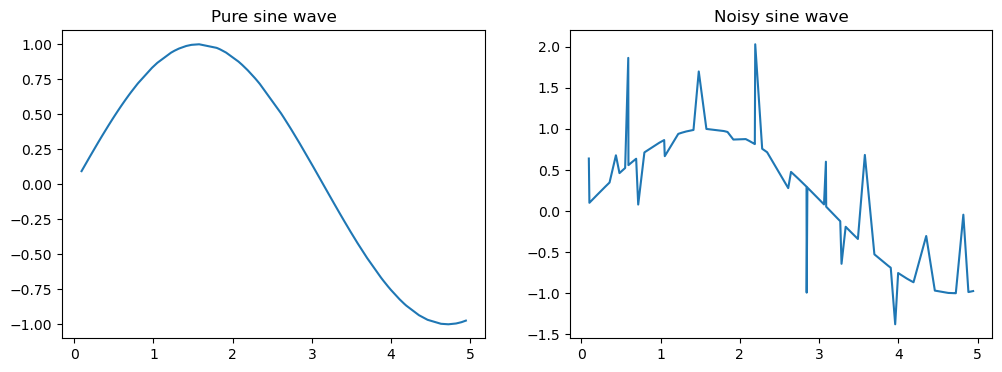

In [25]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor

# Create the training data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()

fig = plt.figure(figsize=(12, 4))
fig.add_subplot(121)
plt.plot(X, y)
plt.title("Pure sine wave")

# We add a random noise every 5 samples
y[::5] += 3 * (0.5 - np.random.rand(16))
fig.add_subplot(122)
plt.plot(X, y)
plt.title("Noisy sine wave")

The objective is to regress this signal `y` from the values of `x`. For this, we use a regression tree.

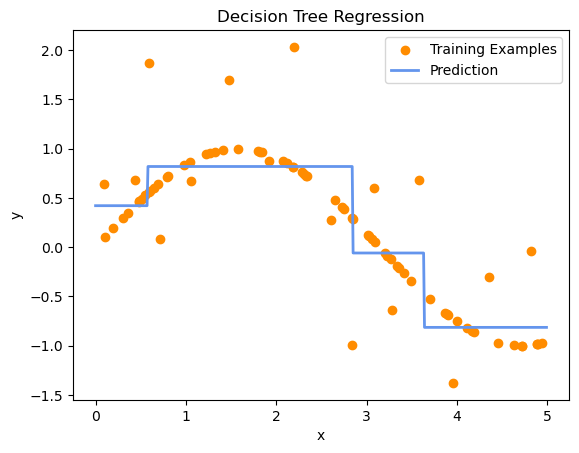

In [26]:
# Learn the model
reg = DecisionTreeRegressor(max_depth=2)
reg.fit(X, y)

# Prediction on the same range of values
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = reg.predict(X_test)

# Display of results
plt.figure()
plt.scatter(X, y, c="darkorange", label="Training Examples")
plt.plot(X_test, y_pred, color="cornflowerblue", label="Prediction", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()



Change the value of the `max_depth` parameter. What happens if we take too large a value? Too small? Change the rate of elements affected by noise (the `y[::5]`). When all elements are affected by noise, should a high or low value for `max_depth` be preferred?

## Solution:

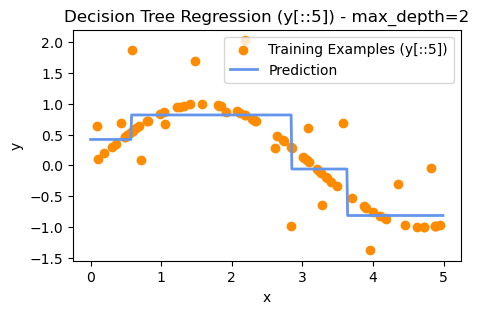

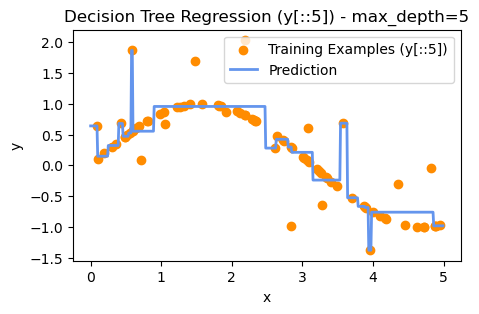

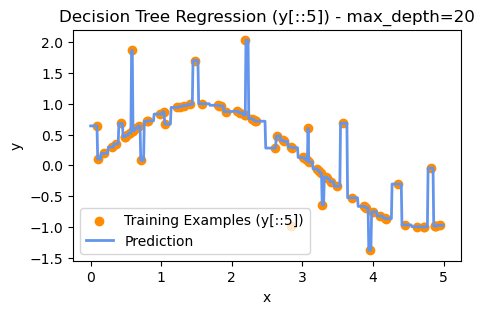

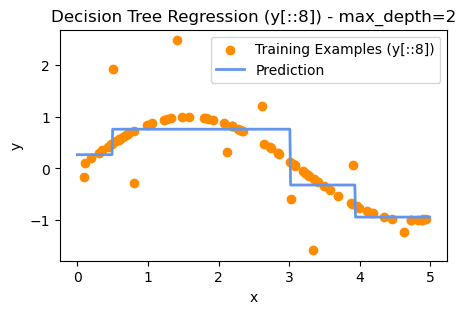

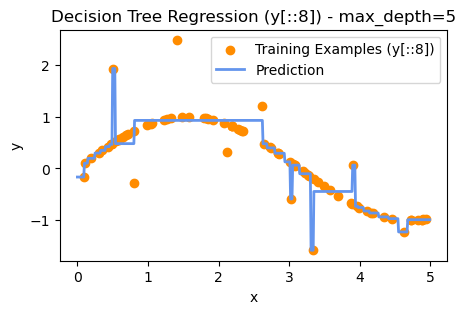

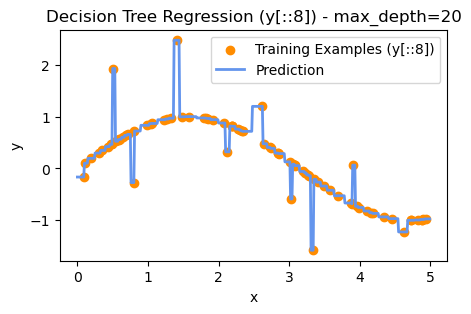

In [28]:
# Creating the training dataset
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y_original = np.sin(X).ravel()

# Creating test data for prediction
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]  

"""
Function to fit and plot the regression tree for different depths and noise levels
"""
def fit_and_plot(X, y, X_test, depth, noise_label):
    reg = DecisionTreeRegressor(max_depth=depth)
    reg.fit(X, y)
    y_pred = reg.predict(X_test)    
    plt.figure(figsize=(5, 3))  
    plt.scatter(X, y, c="darkorange", label=f"Training Examples ({noise_label})")
    plt.plot(X_test, y_pred, color="cornflowerblue", label="Prediction", linewidth=2)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Decision Tree Regression ({noise_label}) - max_depth={depth}")
    plt.legend()
    plt.show()

# Changing the rate of elements affected by noise - (y[::5]) and  (y[::5]):
y_5 = y_original.copy()
y_5[::5] += 3 * (0.5 - np.random.rand(16))
y_8 = y_original.copy()
y_8[::8] += 3 * (0.5 - np.random.rand(10))

# Fitting and ploting trees for both noise levels and different depths
for y, label in [(y_5, "y[::5]"), (y_8, "y[::8]")]:
    for depth in [2, 5, 20]:  # small, medium, large depth values
        fit_and_plot(X, y, X_test, depth, label)



To deepen, load the Diabetes dataset from the `sklearn.datasets` module and make a random partition into learning part and test part (70% learning, 30% testing). Build a regression tree model on this basis. Calculate the root mean square error on the test set. Do a grid search to find the `max_depth` parameter value that minimizes this error.

## Solution:

In [41]:
from sklearn.datasets import load_diabetes
from math import sqrt
from sklearn.metrics import mean_squared_error

# Loading the Diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Splitting the dataset (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Building and training a regression tree model with max_depth=4
regrs = DecisionTreeRegressor(max_depth=4)
regrs.fit(X_train, y_train)
y_pred = regrs.predict(X_test)

# Calculating the RMSE for the model with max_depth=4
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE for max_depth=4: {rmse:.2f}")

# Define the range of max_depth values for grid search
param_grid = {"max_depth": list(range(1, 25))}  # You can adjust the range as needed

# Perform grid search to find the optimal max_depth value
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(),
                           param_grid=param_grid,
                           cv=5,  # Use 5-fold cross-validation
                           scoring='neg_mean_squared_error',
                           refit=True)
grid_search.fit(X_train, y_train)

print("Best max_depth parameter value:")
print(grid_search.best_params_)

# Calculate RMSE for the model with the optimal max_depth
best_regr = grid_search.best_estimator_
y_pred_best = best_regr.predict(X_test)
rmse_best = sqrt(mean_squared_error(y_test, y_pred_best))
print(f"RMSE for best max_depth: {rmse_best:.2f}")


RMSE for max_depth=4: 65.38
Best max_depth parameter value:
{'max_depth': 2}
RMSE for best max_depth: 60.25
